<h2 style = "color:yellow">Z-Test</h2>

In [4]:
# Suppose a company claims that their new smartphone has an average battery life of 12 hours. 
# A consumer group tests 100 phones and finds an average battery life of 11.8 hours with a known population standard deviation of 0.5 hours.

import numpy as np
from scipy.stats import norm

# Step 1: Generate sample data
np.random.seed(42)
data = np.random.normal(loc=11.8, scale=0.5, size=100)

# Step 2: Define parameters
pop_mean = 12       # Claimed mean by company
sigma = 0.5         # Known population standard deviation
n = len(data)
sample_mean = np.mean(data)

# Step 3: Calculate Z-statistic manually
z_statistic = (sample_mean - pop_mean) / (sigma / np.sqrt(n))

# Step 4: Calculate two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_statistic)))

# Step 5: Print results
print(f"Z-Statistic: {z_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Step 6: Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average battery life is different from 12 hours.")
else:
    print("Fail to reject the null hypothesis: The average battery life is not significantly different from 12 hours.")


Z-Statistic: -5.0385
P-Value: 0.0000
Reject the null hypothesis: The average battery life is different from 12 hours.


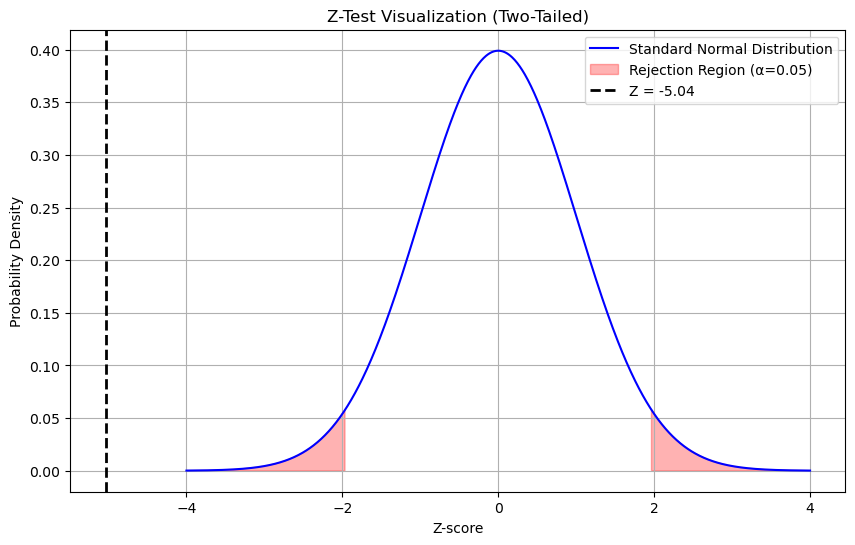

In [6]:
import matplotlib.pyplot as plt 

# Step 5: Plot z-distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Critical z-values for alpha = 0.05 (two-tailed)
z_critical = norm.ppf(1 - 0.05 / 2)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Shade critical regions
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3, label='Rejection Region (α=0.05)')
plt.axvline(z_statistic, color='black', linestyle='--', linewidth=2, label=f'Z = {z_statistic:.2f}')

# Plot settings
plt.title('Z-Test Visualization (Two-Tailed)')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()